# 2. Manipulação de Dados 

In [173]:
import yfinance as yf
import pandas as pd
import datetime as dt

In [174]:
itub4 = yf.download('ITUB4.SA', start='2020-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [175]:
itub_total = itub4.copy()

In [176]:
itub_serires = itub4['Close']

In [177]:
itub4.index.day

Index([ 2,  3,  6,  7,  8,  9, 10, 13, 14, 15,
       ...
       15, 16, 17, 18, 21, 22, 23, 28, 29, 30],
      dtype='int32', name='Date', length=248)

In [178]:
itub4.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=248)

## 2.1 Datetime Lib

In [179]:
data = '04-05-2024'
data = dt.datetime.strptime(data, '%d-%m-%Y')
data

datetime.datetime(2024, 5, 4, 0, 0)

In [180]:
d = dt.datetime.now()
d

datetime.datetime(2024, 7, 18, 15, 52, 46, 94382)

In [181]:
t = dt.datetime.strftime(d, '%A')

In [182]:
dt.datetime.strftime(d, '%B')

'July'

In [183]:
dt.datetime.strftime(d, '%C')

'20'

### 2.12 TimeDelta

In [184]:
d_m_200 = dt.datetime.now() - dt.timedelta(days=200)

In [185]:
dt.datetime.strftime(d_m_200, '%Y-%m-%d')

'2023-12-31'

### 2.13 Usando o Pandas

In [186]:
data = pd.to_datetime(data, format='%d-%m-%Y')

In [187]:
data

Timestamp('2024-05-04 00:00:00')

In [188]:
pd.date_range(data, periods=5, freq='d')

DatetimeIndex(['2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08'],
              dtype='datetime64[ns]', freq='D')

### 2.14 Variáveis AUX

In [189]:
itub4 = itub4.head()

In [190]:
itub4.index = itub4.index.tz_localize('UTC').tz_convert('America/Sao_Paulo')

In [191]:
itub4['Time'] = itub4.index

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_3004\4153394085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4.index


In [192]:
itub4['Time'] = itub4['Time'].dt.time

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_3004\1433894871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4['Time'].dt.time


In [193]:
itub4['DayofYear'] = itub4['Time'].index.dayofyear

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_3004\4289030336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['DayofYear'] = itub4['Time'].index.dayofyear


In [194]:
itub4

,Open,High,Low,Close,Adj Close,Volume,Time,DayofYear
Date,,,,,,,,
2020-01-01 21:00:00-03:00,37.279999,38.029999,36.990002,38.029999,31.228834,20666100,21:00:00,1
2020-01-02 21:00:00-03:00,37.500000,38.240002,37.450001,37.630001,30.900366,24891400,21:00:00,2
2020-01-05 21:00:00-03:00,37.549999,37.580002,36.910000,37.070000,30.440504,22294700,21:00:00,5
2020-01-06 21:00:00-03:00,37.070000,37.240002,36.209999,36.209999,29.734318,20000900,21:00:00,6
2020-01-07 21:00:00-03:00,36.450001,36.810001,35.619999,35.619999,29.249838,25980900,21:00:00,7


##### Método resample

In [202]:
itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})
itub_total

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_3004\1504312676.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})


,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-31,37.279999,38.240002,32.540001,32.820000,26.950567
2020-02-29,33.000000,35.480000,30.570000,32.000000,26.668234
2020-03-31,31.930000,32.290001,20.000000,23.090000,19.251820
2020-04-30,22.219999,25.150000,20.010000,22.770000,18.997360
2020-05-31,21.950001,24.420000,20.730000,23.040001,19.235296
2020-06-30,22.830000,28.700001,22.700001,25.450001,21.261160
2020-07-31,25.600000,28.490000,25.540001,26.889999,22.477394
2020-08-31,27.100000,27.709999,23.510000,23.549999,19.739725
2020-09-30,23.870001,25.500000,22.299999,22.500000,18.871634


<Axes: xlabel='Date'>

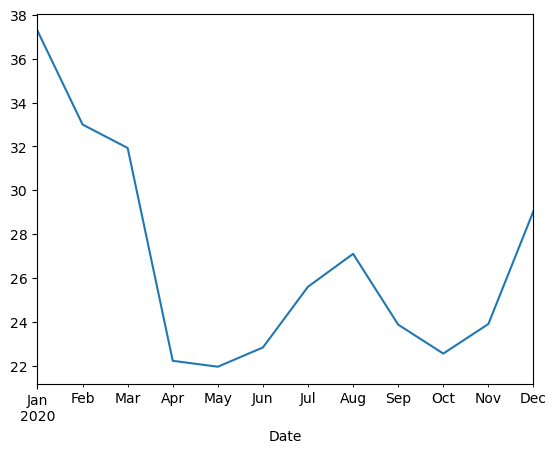

In [203]:
itub_total.Open.plot()

## 2.2 Multi Index